In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
from skimage.filters import gaussian,laplace,threshold_otsu
import scipy.ndimage
import skimage
import math

#Sanad Masannat 1626221 CMPUT 206 Assignment 4 Part 1

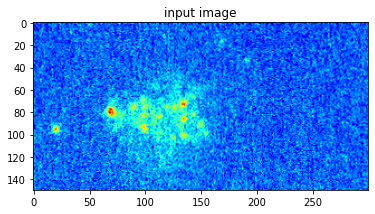

In [2]:
imfile = '/content/img_A4_P1.bmp'
I = io.imread(imfile,as_gray=True)
plt.imshow(I,cmap='jet'),plt.title('input image')
plt.show()

# Create a Laplacian-of-Gaussian Volume

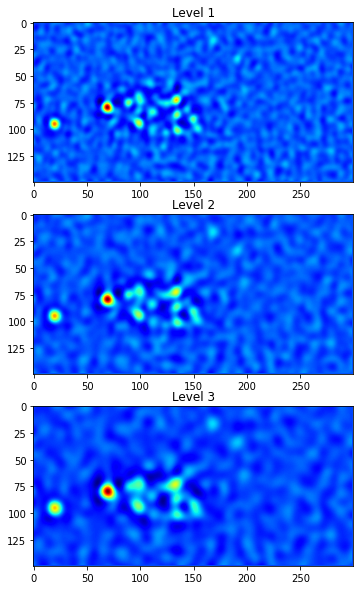

In [3]:
h,w=I.shape
array=np.zeros((h,w,3))
log1=skimage.filters.laplace(skimage.filters.gaussian(I,3.5),ksize=23)#Performs the Gaussian Filter than does a Laplace filter on the image.log=Laplace of Gaussian
log2=skimage.filters.laplace(skimage.filters.gaussian(I,4.5),ksize=29)
log3=skimage.filters.laplace(skimage.filters.gaussian(I,5.5),ksize=35)
array[:,:,0]=log1#Stores the 3 LoG imgaes into a separate channel
array[:,:,1]=log2
array[:,:,2]=log3
f, subPlot = plt.subplots(3,1,figsize=(10,10)) 

    # Prints out the 3 images
subPlot[0].set_title("Level 1")
subPlot[0].imshow(array[:,:,0],'jet')#makes sure the image is in jet map
subPlot[1].set_title("Level 2")
subPlot[1].imshow(array[:,:,1],'jet')
subPlot[2].set_title("Level 3")
subPlot[2].imshow(array[:,:,2],'jet')

#Obtain a rough estimate of blob locations

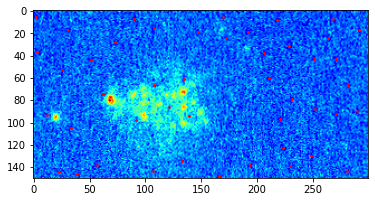

In [4]:
binImage=scipy.ndimage.minimum_filter(array,30)#Finds the local minima in image with a size of 30
localMin=(array== binImage)#Converts it into a binary image
collapsedimage=np.zeros([h,w])#Initializes an image with the same size as the input image
collapsedimage[:,:]=np.sum(localMin,axis=2)
locations=np.nonzero(collapsedimage)#Creates a tuple that has the locations of where the blobs will be
plt.imshow(I,cmap='jet')

plt.scatter(locations[1], locations[0], s=3, c='r')#Plots the location blobs



# Refine the blobs using Otsu thresholding

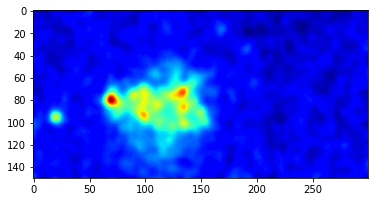

In [5]:
newLocationsx=[]
newLocationsy=[]
gaussianImage=skimage.filters.gaussian(I,3)#Uses a gaussian filter of sigma 3
gaussianImage=skimage.img_as_ubyte(gaussianImage)#onverts it to ubyte_8
otsu=skimage.filters.threshold_otsu(gaussianImage)#Finds the otsu threshold
plt.imshow(gaussianImage,cmap='jet')
for i in range(locations[0].size):#Loops through all the locations find in previous cell to see if any locations are greater than the otsu threshold and stores the co-ordinates in a new array
  if I[(locations[0][i])][(locations[1][i])]>=otsu:
    newLocationsx.append(locations[0][i])
    newLocationsy.append(locations[1][i])


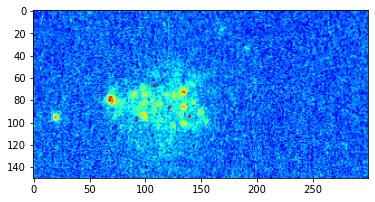

In [6]:
plt.imshow(I,cmap='jet')
plt.scatter(newLocationsy, newLocationsx, s=3, c='r')
